In [1]:
#import necessary libraries:
from mofapy2.run.entry_point import entry_point
import pandas as pd
import numpy as np
import requests

ent= entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [2]:
#load lipidomics data:
lipidomics = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/DataMatrix_Hif1aLipidomics_2023_02_06.csv")
#print(lipidomics.shape)
print(lipidomics.shape)
lipidomics

(592, 44)


,Unnamed: 0,HFDHFDHFD_wt_1,HFDHFDHFD_ko_2,HFDHFDHFD_ko_3,HFDHFDHFD_ko_4,HFDCDCD_wt_5,HFDCDCD_ko_6,HFDHFDHFD_ko_7,HFDHFDHFD_wt_8,HFDHFDHFD_wt_9,...,CDCDCD_ko_34,CDCDHFD_ko_35,CDCDHFD_ko_36,CDCDHFD_wt_37,CDCDHFD_wt_38,HFDCDCD_ko_39,HFDCDCD_ko_40,HFDCDCD_wt_41,HFDCDCD_wt_42,HFDHFDHFD_wt_43
0,CE(14:0),6.650025,0.000000,4.181307,0.000000,10.938247,0.000000,3.522412,4.005629,3.575264,...,3.575227,4.566039,2.552531,0.000000,0.000000,0.000000,2.544966,24.036418,4.571681,12.281212
1,CE(16:2),0.000000,0.000000,0.000000,0.000000,6.957272,0.000000,3.000228,0.000000,4.394697,...,2.689101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,CE(16:1),158.015359,451.752039,275.383565,166.915406,786.966970,117.962915,351.729455,329.589851,195.499540,...,445.117716,180.419666,146.627023,55.652486,59.057491,118.723234,147.184311,37.291394,157.485707,152.060589
3,CE(16:0),107.574454,219.146989,112.307327,144.768134,310.988967,46.599473,174.689734,184.674411,146.272612,...,159.282750,72.702119,50.450863,49.904373,46.007444,55.617250,65.431712,66.179840,95.043575,140.242586
4,CE(18:4),0.000000,0.000000,0.000000,0.000000,2.806069,0.000000,0.000000,0.000000,0.000000,...,2.086477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,TAG(67:10)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
588,TAG(67:8)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162514,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
589,TAG(67:7)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
590,TAG(67:6)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.084070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
#remove features with more than 50% missing values:
data = []
for i in lipidomics.columns:
     #print(lipidomics[i].eq(0).mean())
     if lipidomics[i].eq(0).mean() <= 0.31:
        data.append(lipidomics[i])
lipidomics_wt = pd.DataFrame(data)
print(lipidomics_wt.shape)
lipidomics_wt.head()

(30, 592)


,0,1,2,3,4,5,6,7,8,9,...,582,583,584,585,586,587,588,589,590,591
Unnamed: 0,CE(14:0),CE(16:2),CE(16:1),CE(16:0),CE(18:4),CE(18:3),CE(18:2),CE(18:1),CE(18:0),CE(20:4),...,TAG(65:7)_TAGODD,TAG(65:6)_TAGODD,TAG(65:5)_TAGODD,TAG(65:4)_TAGODD,TAG(65:3)_TAGODD,TAG(67:10)_TAGODD,TAG(67:8)_TAGODD,TAG(67:7)_TAGODD,TAG(67:6)_TAGODD,TAG(67:5)_TAGODD
HFDHFDHFD_wt_1,6.650025,0.0,158.015359,107.574454,0.0,26.72863,369.692553,1114.417013,80.080463,218.553327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HFDHFDHFD_ko_2,0.0,0.0,451.752039,219.146989,0.0,40.986361,733.383586,3183.535166,135.345417,258.311087,...,0.0,0.920441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HFDHFDHFD_ko_3,4.181307,0.0,275.383565,112.307327,0.0,40.534273,524.852592,2288.963379,91.882237,255.231843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HFDHFDHFD_ko_4,0.0,0.0,166.915406,144.768134,0.0,87.011835,908.887192,2618.446432,149.793971,237.449718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
lipidomics_wt.head()
lipidomics= lipidomics_wt.T
lipidomics.head()
lipidomics.shape

(592, 30)

In [5]:
data = []
for i in range(len(lipidomics)):
     #print(lipidomics.iloc[i].eq(0).mean())
     if lipidomics.iloc[i, 1:].eq(0).mean() <= 0.9:
        data.append(lipidomics.iloc[i])
lipidomics_remove_rows = pd.DataFrame(data)
lipidomics_remove_rows
lipidomics_remove_rows

,Unnamed: 0,HFDHFDHFD_wt_1,HFDHFDHFD_ko_2,HFDHFDHFD_ko_3,HFDHFDHFD_ko_4,HFDCDCD_wt_5,HFDCDCD_ko_6,HFDHFDHFD_ko_7,HFDHFDHFD_wt_8,HFDHFDHFD_wt_9,...,CDCDCD_ko_25,CDCDHFD_ko_28,CDCDHFD_wt_29,HFDHFDHFD_ko_30,HFDCDCD_ko_31,CDCDCD_ko_34,CDCDHFD_ko_36,CDCDHFD_wt_38,HFDCDCD_wt_42,HFDHFDHFD_wt_43
0,CE(14:0),6.650025,0.000000,4.181307,0.000000,10.938247,0.000000,3.522412,4.005629,3.575264,...,4.249713,0.000000,0.000000,8.757124,1.753378,3.575227,2.552531,0.000000,4.571681,12.281212
1,CE(16:2),0.000000,0.000000,0.000000,0.000000,6.957272,0.000000,3.000228,0.000000,4.394697,...,4.869585,0.000000,0.000000,2.186689,0.000000,2.689101,0.000000,0.000000,0.000000,0.000000
2,CE(16:1),158.015359,451.752039,275.383565,166.915406,786.966970,117.962915,351.729455,329.589851,195.499540,...,409.237245,45.995587,38.724764,222.207191,146.697250,445.117716,146.627023,59.057491,157.485707,152.060589
3,CE(16:0),107.574454,219.146989,112.307327,144.768134,310.988967,46.599473,174.689734,184.674411,146.272612,...,206.992598,39.816751,38.811357,159.831027,67.722213,159.282750,50.450863,46.007444,95.043575,140.242586
4,CE(18:4),0.000000,0.000000,0.000000,0.000000,2.806069,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.086477,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,TAG(65:9)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.103191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209684
583,TAG(65:6)_TAGODD,0.000000,0.920441,0.000000,0.000000,0.462718,2.060842,0.235740,0.625479,0.000000,...,0.134879,0.519016,0.000000,0.432755,0.449036,0.302346,0.000000,0.000000,0.162093,1.260512
584,TAG(65:5)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002993,0.000000,0.000000,0.000000,...,0.000000,0.054963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001710
585,TAG(65:4)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.213571,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.396127,0.000000,0.000000,0.000000,0.000000,0.166874,0.326771


In [6]:
import pandas as pd

num_features = 500  
# Select only numeric columns
numeric_cols = lipidomics_remove_rows.select_dtypes(include=[np.number])
gene_variance = numeric_cols.var(axis=1)

top_features = gene_variance.nlargest(num_features).index

df = lipidomics_remove_rows.loc[top_features]

print("Shape after feature selection:", df.shape)

Shape after feature selection: (500, 30)


In [7]:
#lipodomics data:
#lipodomics data:
data_list = []

for i in range(len(lipidomics_remove_rows)):
    row = lipidomics_remove_rows.iloc[i, 1:].T.reset_index()
    row.columns = ['sample', 'value']  
    #print(row)
   
    feature = lipidomics_remove_rows.iloc[i, 0] 
    #print(feature)
    
    
    row['feature'] = feature
    
    
    lipid_class = feature.split("(")[0]
    #print(lipid_class)

    row['view'] = "Lipidomics"

    
    
    row['group'] = "group_A"
    data_list.append(row)

df1_lipidomics = pd.concat(data_list, ignore_index=True)

df1_lipidomics


,sample,value,feature,view,group
0,HFDHFDHFD_wt_1,6.650025,CE(14:0),Lipidomics,group_A
1,HFDHFDHFD_ko_2,0.0,CE(14:0),Lipidomics,group_A
2,HFDHFDHFD_ko_3,4.181307,CE(14:0),Lipidomics,group_A
3,HFDHFDHFD_ko_4,0.0,CE(14:0),Lipidomics,group_A
4,HFDCDCD_wt_5,10.938247,CE(14:0),Lipidomics,group_A
...,...,...,...,...,...
15481,CDCDCD_ko_34,0.0,TAG(65:3)_TAGODD,Lipidomics,group_A
15482,CDCDHFD_ko_36,0.0,TAG(65:3)_TAGODD,Lipidomics,group_A
15483,CDCDHFD_wt_38,0.0,TAG(65:3)_TAGODD,Lipidomics,group_A
15484,HFDCDCD_wt_42,0.302382,TAG(65:3)_TAGODD,Lipidomics,group_A


In [8]:
#remove missing values:
final_lipodomics= df1_lipidomics[df1_lipidomics["value"] != 0]
final_lipodomics.head()
final_lipodomics.shape

(12829, 5)

In [9]:
#Normalization of lipidomics data:
#log2:
final_lipodomics["value"] = final_lipodomics["value"].apply(lambda x: np.log2(x + 1))
final_lipodomics

,sample,value,feature,view,group
0,HFDHFDHFD_wt_1,2.935464,CE(14:0),Lipidomics,group_A
2,HFDHFDHFD_ko_3,2.373316,CE(14:0),Lipidomics,group_A
4,HFDCDCD_wt_5,3.577519,CE(14:0),Lipidomics,group_A
6,HFDHFDHFD_ko_7,2.177092,CE(14:0),Lipidomics,group_A
7,HFDHFDHFD_wt_8,2.323551,CE(14:0),Lipidomics,group_A
...,...,...,...,...,...
15466,HFDHFDHFD_ko_10,0.686045,TAG(65:3)_TAGODD,Lipidomics,group_A
15471,HFDHFDHFD_ko_17,0.111735,TAG(65:3)_TAGODD,Lipidomics,group_A
15479,HFDHFDHFD_ko_30,0.658264,TAG(65:3)_TAGODD,Lipidomics,group_A
15480,HFDCDCD_ko_31,0.217405,TAG(65:3)_TAGODD,Lipidomics,group_A


In [10]:
#sort values ascending:
final_lipodomics = final_lipodomics.sort_values(by = "value", ascending = True)
final_lipodomics.head()


,sample,value,feature,view,group
15051,HFDHFDHFD_wt_1,-0.044485,TAG(61:4)_TAGODD,Lipidomics,group_A
13021,HFDHFDHFD_wt_1,-0.038046,TAG(45:4)_TAGODD,Lipidomics,group_A
13398,HFDHFDHFD_wt_1,-0.038046,TAG(49:5)_TAGODD,Lipidomics,group_A
13224,HFDHFDHFD_wt_1,-0.038046,TAG(47:4)_TAGODD,Lipidomics,group_A
12818,HFDHFDHFD_wt_1,-0.035906,TAG(43:6)_TAGODD,Lipidomics,group_A


In [11]:
final_lipodomics.describe()

,value
count,12829.000000
mean,4.419227
std,3.433088
min,-0.044485
25%,1.641734
50%,3.634732
75%,6.487653
max,18.071889


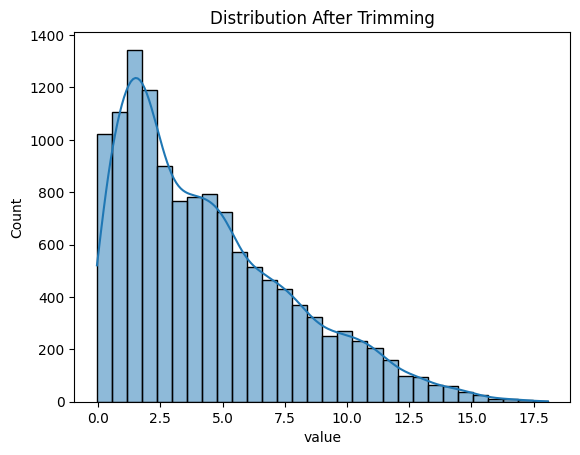

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_lipodomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()

In [13]:
Q1 = final_lipodomics["value"].quantile(0.25)
Q3 = final_lipodomics["value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
final_lipodomics = final_lipodomics[(final_lipodomics["value"] >= lower_bound) & (final_lipodomics["value"] <= upper_bound)]


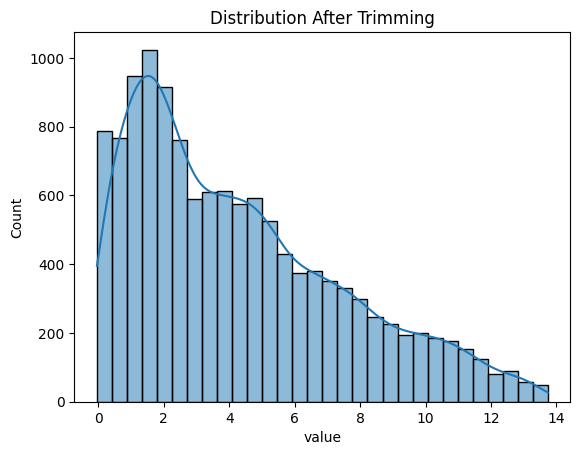

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_lipodomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()

In [15]:
final_lipodomics.describe()

,value
count,12666.000000
mean,4.284704
std,3.240719
min,-0.044485
25%,1.624539
50%,3.579276
75%,6.353471
max,13.737421


In [16]:
#remove values less than 2.09 :
#final_lipodomics = final_lipodomics[final_lipodomics["value"] >= 1]
#final_lipodomics

In [17]:
#remove values greater than 6:
#final_lipodomics = final_lipodomics[final_lipodomics["value"] <= 10]
#final_lipodomics

In [18]:
#sort values ascending:
final_lipodomics = final_lipodomics.sort_values(by = "value", ascending = False)
final_lipodomics

,sample,value,feature,view,group
7686,HFDHFDHFD_ko_2,13.737421,TAG(50:1)_TAG,Lipidomics,group_A
10391,HFDHFDHFD_ko_10,13.719714,TAG(54:2)_TAG2,Lipidomics,group_A
10372,CDCDCD_ko_25,13.710766,TAG(54:3)_TAG2,Lipidomics,group_A
7807,HFDHFDHFD_ko_7,13.684688,TAG(52:3)_TAG,Lipidomics,group_A
10359,HFDHFDHFD_ko_7,13.682020,TAG(54:3)_TAG2,Lipidomics,group_A
...,...,...,...,...,...
12818,HFDHFDHFD_wt_1,-0.035906,TAG(43:6)_TAGODD,Lipidomics,group_A
13398,HFDHFDHFD_wt_1,-0.038046,TAG(49:5)_TAGODD,Lipidomics,group_A
13021,HFDHFDHFD_wt_1,-0.038046,TAG(45:4)_TAGODD,Lipidomics,group_A
13224,HFDHFDHFD_wt_1,-0.038046,TAG(47:4)_TAGODD,Lipidomics,group_A


-----------------------------------------------------------------------------------------------------------------------------------------------

Transcriptomics_HC

In [19]:
#load transcriptomics HC data by identifier
transcriptomics_hepatocyte=pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/normalized_counts_transcriptomics_deseq.csv")
transcriptomics_hepatocyte.head()
transcriptomics_hepatocyte.shape

(53464, 34)

In [20]:
#replace the identifiers to gene:
#load the gene mapping file:
gene= pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/RowAnno_Hepatocytes_RNAseq (1).csv")
print(gene.columns)  # Print the column names to identify the correct column name
gene.head()

Index(['Unnamed: 0', 'GENEID', 'SYMBOL', 'GENETYPE'], dtype='object')


,Unnamed: 0,GENEID,SYMBOL,GENETYPE
0,ENSMUSG00000000001.4,ENSMUSG00000000001.4,Gnai3,protein_coding
1,ENSMUSG00000000003.15,ENSMUSG00000000003.15,Pbsn,protein_coding
2,ENSMUSG00000000028.14,ENSMUSG00000000028.14,Cdc45,protein_coding
3,ENSMUSG00000000031.16,ENSMUSG00000000031.16,H19,lincRNA
4,ENSMUSG00000000037.16,ENSMUSG00000000037.16,Scml2,protein_coding


In [21]:
transcriptomics_hepatocyte['Unnamed: 0'] = gene['SYMBOL'] 
transcriptomics_hepatocyte.head()

,Unnamed: 0,ID_12581,ID_12582,ID_12583,ID_12591,ID_12595,ID_12572,ID_12590,ID_12629,ID_12630,...,ID_12619,ID_12693,ID_12618,ID_12655,ID_12665,ID_12690,ID_12691,ID_12692,ID_12654,ID_12677
0,Gnai3,84.603412,184.427808,100.527015,172.825392,76.709450,124.984184,99.309151,155.504953,50.440258,...,137.095476,113.016138,94.821235,128.881739,170.211301,5.118223,77.881258,192.513722,169.994889,66.325394
1,Pbsn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Cdc45,49.252690,34.210892,37.810161,81.134434,34.386995,267.123061,183.253489,49.590162,11.546565,...,39.020822,0.000000,49.220183,0.000000,19.178738,0.000000,0.000000,0.000000,0.000000,0.000000
3,H19,10.327177,1.399536,0.000000,0.000000,1.587092,4.901341,0.000000,0.000000,2.430856,...,0.000000,0.000000,1.447652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Scml2,0.000000,1.710545,0.000000,2.412920,0.000000,0.000000,1.873758,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
#remove % of features with 0 values:
df_reset = transcriptomics_hepatocyte.reset_index(drop=True)
data = []
for i in df_reset.columns:
     #print(df_reset[i].eq(0).mean())
     if df_reset[i].eq(0).mean() <= 0.73:
        data.append(df_reset[i])
df_hepatocyte_1 = pd.DataFrame(data)
df_hepatocyte_1

,0,1,2,3,4,5,6,7,8,9,...,53454,53455,53456,53457,53458,53459,53460,53461,53462,53463
Unnamed: 0,Gnai3,Pbsn,Cdc45,H19,Scml2,Apoh,Narf,Cav2,Klf6,Scmh1,...,AC164883.9,AC154766.1,AC137902.2,AC154806.7,AC154323.3,AC107711.6,AC109172.2,AC114008.2,AC156016.5,AC118639.2
ID_12581,84.603412,0.0,49.25269,10.327177,0.0,3967.224767,186.683584,75.070633,329.675266,33.364726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_12582,184.427808,0.0,34.210892,1.399536,1.710545,1550.375416,144.61877,51.471842,736.000686,85.838238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_12583,100.527015,0.0,37.810161,0.0,0.0,3213.863689,68.718467,17.104597,307.88274,38.710403,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_12591,172.825392,0.0,81.134434,0.0,2.41292,1884.490491,274.771261,20.208205,999.25048,19.001745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_12595,76.70945,0.0,34.386995,1.587092,0.0,8487.23938,149.715686,10.051583,292.553972,28.567657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_12572,124.984184,0.0,267.123061,4.901341,0.0,5775.617189,238.327685,0.0,953.923408,17.76736,...,0.0,5.514008,0.612668,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_12590,99.309151,0.0,183.253489,0.0,1.873758,4670.153341,338.775367,0.0,634.829061,31.853879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_12629,155.504953,0.0,49.590162,0.0,0.0,1351.791087,142.03602,47.141265,388.762382,63.671319,...,0.0,0.0,1.224448,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_12630,50.440258,0.0,11.546565,2.430856,0.0,729.256736,88.726236,27.954842,357.943515,63.20225,...,0.0,0.0,1.215428,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df= df_hepatocyte_1.T
df

,Unnamed: 0,ID_12581,ID_12582,ID_12583,ID_12591,ID_12595,ID_12572,ID_12590,ID_12629,ID_12630,...,ID_12567,ID_12616,ID_12644,ID_12645,ID_12603,ID_12619,ID_12693,ID_12618,ID_12692,ID_12677
0,Gnai3,84.603412,184.427808,100.527015,172.825392,76.70945,124.984184,99.309151,155.504953,50.440258,...,127.65033,59.432632,64.410822,46.106617,204.015187,137.095476,113.016138,94.821235,192.513722,66.325394
1,Pbsn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cdc45,49.25269,34.210892,37.810161,81.134434,34.386995,267.123061,183.253489,49.590162,11.546565,...,0.0,101.305623,9.114739,7.998087,51.599172,39.020822,0.0,49.220183,0.0,0.0
3,H19,10.327177,1.399536,0.0,0.0,1.587092,4.901341,0.0,0.0,2.430856,...,0.0,0.0,0.607649,0.0,0.0,0.0,0.0,1.447652,0.0,0.0
4,Scml2,0.0,1.710545,0.0,2.41292,0.0,0.0,1.873758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53459,AC107711.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53460,AC109172.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53461,AC114008.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.742001,0.0,0.0,0.0,0.0
53462,AC156016.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
data = []
for i in range(len(df)):
     #print(df.iloc[i].eq(0).mean())
     if df.iloc[i, 1:].eq(0).mean() <= 0.4:
        data.append(df.iloc[i])
hc_remove_rows = pd.DataFrame(data)
hc_remove_rows

,Unnamed: 0,ID_12581,ID_12582,ID_12583,ID_12591,ID_12595,ID_12572,ID_12590,ID_12629,ID_12630,...,ID_12567,ID_12616,ID_12644,ID_12645,ID_12603,ID_12619,ID_12693,ID_12618,ID_12692,ID_12677
0,Gnai3,84.603412,184.427808,100.527015,172.825392,76.709450,124.984184,99.309151,155.504953,50.440258,...,127.650330,59.432632,64.410822,46.106617,204.015187,137.095476,113.016138,94.821235,192.513722,66.325394
2,Cdc45,49.252690,34.210892,37.810161,81.134434,34.386995,267.123061,183.253489,49.590162,11.546565,...,0.000000,101.305623,9.114739,7.998087,51.599172,39.020822,0.000000,49.220183,0.000000,0.000000
5,Apoh,3967.224767,1550.375416,3213.863689,1884.490491,8487.239380,5775.617189,4670.153341,1351.791087,729.256736,...,1497.058896,14267.884001,4787.060913,3245.341281,3643.695372,703.071591,19574.395124,12634.386736,25820.573267,31943.968029
6,Narf,186.683584,144.618770,68.718467,274.771261,149.715686,238.327685,338.775367,142.036020,88.726236,...,113.299109,124.268231,40.712501,204.656923,143.683848,213.046719,41.977423,104.230976,203.062419,55.271162
7,Cav2,75.070633,51.471842,17.104597,20.208205,10.051583,0.000000,0.000000,47.141265,27.954842,...,28.702441,101.305623,36.458956,81.862769,15.082835,82.570846,9.687098,81.792363,94.938274,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53425,AC120375.2,11.915973,1.710545,4.201129,0.301615,1.058061,0.612668,10.867794,4.285570,16.408277,...,1.510655,0.000000,7.291791,13.643795,3.969167,1.742001,0.000000,2.171479,0.000000,2.763558
53427,AC166369.3,0.000000,0.000000,1.800484,1.206460,0.000000,6.739343,5.246521,11.020036,1.823142,...,0.000000,12.156675,0.000000,1.411427,7.144501,0.348400,0.000000,0.000000,0.000000,0.000000
53429,CT009530.1,27.009540,5.753650,3.901048,66.656914,0.529031,11.640684,7.495030,9.795588,11.546565,...,3.776637,2.701483,2.430597,9.879989,3.969167,22.471813,3.229033,0.723826,13.185871,1.381779
53447,AC137871.4,4.369190,0.622016,1.800484,2.111305,1.587092,17.767360,4.871770,5.510018,9.723423,...,11.329911,0.000000,9.114739,20.230454,3.175334,0.871000,8.072581,0.000000,23.734568,13.817790


In [25]:
df =hc_remove_rows.set_index('Unnamed: 0').iloc[:,]
df.head()

,ID_12581,ID_12582,ID_12583,ID_12591,ID_12595,ID_12572,ID_12590,ID_12629,ID_12630,ID_12631,...,ID_12567,ID_12616,ID_12644,ID_12645,ID_12603,ID_12619,ID_12693,ID_12618,ID_12692,ID_12677
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gnai3,84.603412,184.427808,100.527015,172.825392,76.709450,124.984184,99.309151,155.504953,50.440258,106.784544,...,127.650330,59.432632,64.410822,46.106617,204.015187,137.095476,113.016138,94.821235,192.513722,66.325394
Cdc45,49.252690,34.210892,37.810161,81.134434,34.386995,267.123061,183.253489,49.590162,11.546565,122.014755,...,0.000000,101.305623,9.114739,7.998087,51.599172,39.020822,0.000000,49.220183,0.000000,0.000000
Apoh,3967.224767,1550.375416,3213.863689,1884.490491,8487.239380,5775.617189,4670.153341,1351.791087,729.256736,778.990653,...,1497.058896,14267.884001,4787.060913,3245.341281,3643.695372,703.071591,19574.395124,12634.386736,25820.573267,31943.968029
Narf,186.683584,144.618770,68.718467,274.771261,149.715686,238.327685,338.775367,142.036020,88.726236,186.050867,...,113.299109,124.268231,40.712501,204.656923,143.683848,213.046719,41.977423,104.230976,203.062419,55.271162
Cav2,75.070633,51.471842,17.104597,20.208205,10.051583,0.000000,0.000000,47.141265,27.954842,58.497854,...,28.702441,101.305623,36.458956,81.862769,15.082835,82.570846,9.687098,81.792363,94.938274,0.000000


In [26]:
import pandas as pd

num_features = 500  
gene_variance = df.var(axis=1)


top_features = gene_variance.nlargest(num_features).index


df = df.loc[top_features]

print("Shape after feature selection:", df.shape)


Shape after feature selection: (500, 24)


In [27]:
#transcriptomics HC data:

data_list = []
 
for i in range(len(df)):
    row = df.iloc[i,].T.reset_index()
    row.columns = ['sample', 'value']  
    

    feature = str(df.index[i])
    #print(feature)
    
    
    row['feature'] = feature
    
    
    transcriptomics_class= feature.split("0")[0] 
    

    row['view'] = "transcriptomics_hc"

    
    
    row['group'] = "group_B"
    data_list.append(row)


final_trans_hc = pd.concat(data_list, ignore_index=True)
final_trans_hc

,sample,value,feature,view,group
0,ID_12581,450483.377013,mt-Co1,transcriptomics_hc,group_B
1,ID_12582,99526.015471,mt-Co1,transcriptomics_hc,group_B
2,ID_12583,272345.389669,mt-Co1,transcriptomics_hc,group_B
3,ID_12591,400752.526610,mt-Co1,transcriptomics_hc,group_B
4,ID_12595,512751.358831,mt-Co1,transcriptomics_hc,group_B
...,...,...,...,...,...
11995,ID_12619,48.601827,Il1r2,transcriptomics_hc,group_B
11996,ID_12693,54.893553,Il1r2,transcriptomics_hc,group_B
11997,ID_12618,123.774284,Il1r2,transcriptomics_hc,group_B
11998,ID_12692,0.000000,Il1r2,transcriptomics_hc,group_B


In [28]:
#remove missing values:
final_transcriptomics_hc= final_trans_hc[final_trans_hc["value"] != 0]
final_transcriptomics_hc.head()
final_transcriptomics_hc.shape


(11952, 5)

In [29]:
final_transcriptomics_hc

,sample,value,feature,view,group
0,ID_12581,450483.377013,mt-Co1,transcriptomics_hc,group_B
1,ID_12582,99526.015471,mt-Co1,transcriptomics_hc,group_B
2,ID_12583,272345.389669,mt-Co1,transcriptomics_hc,group_B
3,ID_12591,400752.526610,mt-Co1,transcriptomics_hc,group_B
4,ID_12595,512751.358831,mt-Co1,transcriptomics_hc,group_B
...,...,...,...,...,...
11993,ID_12645,79.510391,Il1r2,transcriptomics_hc,group_B
11994,ID_12603,104.786011,Il1r2,transcriptomics_hc,group_B
11995,ID_12619,48.601827,Il1r2,transcriptomics_hc,group_B
11996,ID_12693,54.893553,Il1r2,transcriptomics_hc,group_B


In [30]:
#sort values descending:
final_transcriptomics_hc.sort_values(by='value', ascending=True)


,sample,value,feature,view,group
9849,ID_12631,5.192117e-01,Mup5,transcriptomics_hc,group_B
5433,ID_12631,5.192117e-01,Muc1,transcriptomics_hc,group_B
8155,ID_12619,5.226003e-01,Cyp2c50,transcriptomics_hc,group_B
9841,ID_12582,7.775203e-01,Mup5,transcriptomics_hc,group_B
6465,ID_12631,8.653529e-01,Pemt,transcriptomics_hc,group_B
...,...,...,...,...,...
64,ID_12644,2.408047e+06,mt-Cytb,transcriptomics_hc,group_B
23,ID_12677,2.477928e+06,mt-Co1,transcriptomics_hc,group_B
47,ID_12677,2.676641e+06,mt-Co3,transcriptomics_hc,group_B
37,ID_12647,3.356668e+06,mt-Co3,transcriptomics_hc,group_B


In [31]:
final_transcriptomics_hc.describe()

,value
count,1.195200e+04
mean,1.778168e+04
std,1.160571e+05
min,5.192117e-01
25%,7.099063e+02
50%,1.675673e+03
75%,4.192665e+03
max,3.727347e+06


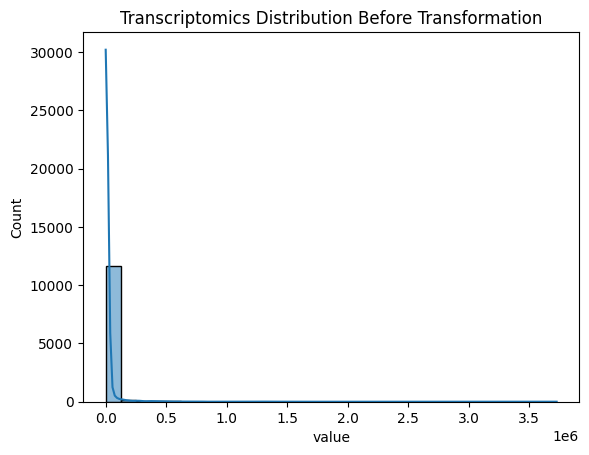

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_transcriptomics_hc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution Before Transformation")
plt.show()

In [33]:
Q1 = final_transcriptomics_hc["value"].quantile(0.25)
Q3 = final_transcriptomics_hc["value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
final_transcriptomics_hc = final_transcriptomics_hc[(final_transcriptomics_hc["value"] >= lower_bound) & (final_transcriptomics_hc["value"] <= upper_bound)]


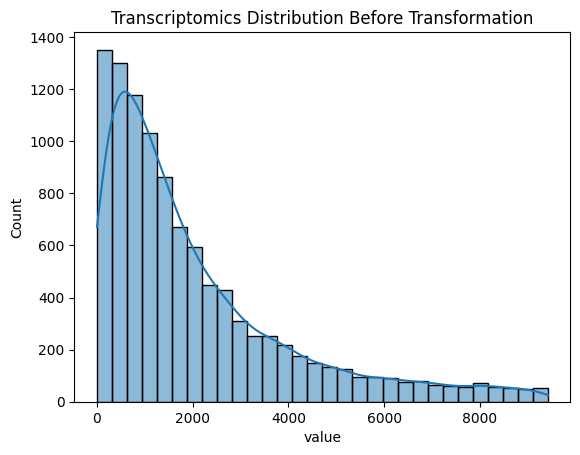

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_transcriptomics_hc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution Before Transformation")
plt.show()

In [35]:
#remove values less than 0.09 :
#final_trans_hc = final_trans_hc[final_trans_hc["value"] >= 1]
#final_trans_hc

In [36]:
#remove values greater than 7.09:
#final_trans_hc= final_trans_hc[final_trans_hc["value"] <= 10]
#final_trans_hc

In [37]:
final_transcriptomics_hc.describe()

,value
count,10369.000000
mean,2048.525787
std,2013.624015
min,0.519212
25%,615.130695
50%,1369.830186
75%,2775.384095
max,9416.086370


In [38]:
#sort values descending:
final_transcriptomics_hc= final_transcriptomics_hc.sort_values(by = "value", ascending = False)
final_transcriptomics_hc

,sample,value,feature,view,group
1811,ID_12617,9416.086370,Apoa5,transcriptomics_hc,group_B
2679,ID_12616,9410.617044,Azgp1,transcriptomics_hc,group_B
1552,ID_12644,9402.764734,Ambp,transcriptomics_hc,group_B
2062,ID_12692,9400.207682,mt-Ts1,transcriptomics_hc,group_B
1103,ID_12677,9394.715747,Actb,transcriptomics_hc,group_B
...,...,...,...,...,...
11121,ID_12631,0.865353,Cyp7b1,transcriptomics_hc,group_B
9841,ID_12582,0.777520,Mup5,transcriptomics_hc,group_B
8155,ID_12619,0.522600,Cyp2c50,transcriptomics_hc,group_B
9849,ID_12631,0.519212,Mup5,transcriptomics_hc,group_B


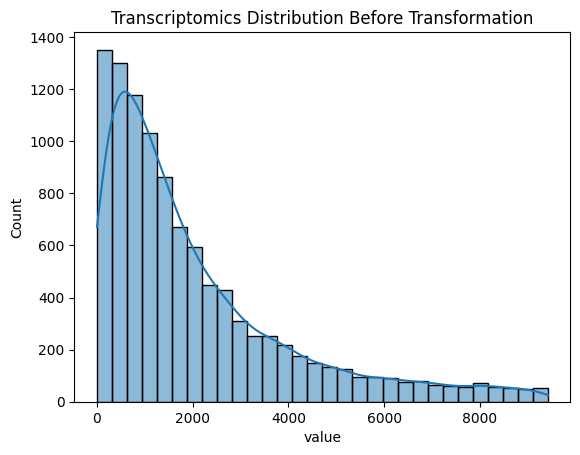

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_transcriptomics_hc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution Before Transformation")
plt.show()

---------------------------------------------------------------------------------------------------------------------------

 transcriptomics KC

In [40]:
#load transcriptomics KC data:
transcriptomics_kc = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/normalized_counts_kc_deseq.csv", sep="\,")
transcriptomics_kc.columns.values[0] = "Unnamed: 0"
transcriptomics_kc.head()

,Unnamed: 0,"""ID_12568""","""ID_12573""","""ID_12574""","""ID_12585""","""ID_12592""","""ID_12569""","""ID_12584""","""ID_12620""","""ID_12621""",...,"""ID_12597""","""ID_12607""","""ID_12649""","""ID_12656""","""ID_12678""","""ID_12680""","""ID_12648""","""ID_12668""","""ID_12669""","""ID_12670"""
0,"""ENSMUSG00000000001.4""",247.462589,210.488231,224.930216,232.045023,111.849604,160.415059,170.563558,157.270306,236.576682,...,172.654037,194.613943,415.340256,310.703624,543.506365,928.081137,362.922131,466.887383,307.231048,611.663092
1,"""ENSMUSG00000000003.15""",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999268,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"""ENSMUSG00000000028.14""",0.000000,32.742614,33.390101,51.096007,16.082950,112.586822,34.230749,17.282451,39.970717,...,40.536165,32.144941,79.403284,13.627352,0.000000,24.718868,0.000000,5.817911,12.683851,58.253628
3,"""ENSMUSG00000000031.16""",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.770556,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"""ENSMUSG00000000037.16""",0.000000,1.375740,0.258838,0.000000,0.000000,0.423259,0.000000,0.000000,0.499634,...,0.000000,1.495114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
#replace the identifiers to gene:
#load the gene mapping file:
gene_kc= pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/RowAnno_KupfferCells_RNAseq.csv")
print(gene_kc.columns)  # Print the column names to identify the correct column name
gene_kc.head()

Index(['Unnamed: 0', 'GENEID', 'SYMBOL', 'GENETYPE'], dtype='object')


,Unnamed: 0,GENEID,SYMBOL,GENETYPE
0,ENSMUSG00000000001.4,ENSMUSG00000000001.4,Gnai3,protein_coding
1,ENSMUSG00000000003.15,ENSMUSG00000000003.15,Pbsn,protein_coding
2,ENSMUSG00000000028.14,ENSMUSG00000000028.14,Cdc45,protein_coding
3,ENSMUSG00000000031.16,ENSMUSG00000000031.16,H19,lincRNA
4,ENSMUSG00000000037.16,ENSMUSG00000000037.16,Scml2,protein_coding


In [42]:
#merge symbol to the unamed column
transcriptomics_kc['Unnamed: 0'] =  gene_kc['SYMBOL'] + "__" + gene_kc['GENEID']
transcriptomics_kc.head()

,Unnamed: 0,"""ID_12568""","""ID_12573""","""ID_12574""","""ID_12585""","""ID_12592""","""ID_12569""","""ID_12584""","""ID_12620""","""ID_12621""",...,"""ID_12597""","""ID_12607""","""ID_12649""","""ID_12656""","""ID_12678""","""ID_12680""","""ID_12648""","""ID_12668""","""ID_12669""","""ID_12670"""
0,Gnai3__ENSMUSG00000000001.4,247.462589,210.488231,224.930216,232.045023,111.849604,160.415059,170.563558,157.270306,236.576682,...,172.654037,194.613943,415.340256,310.703624,543.506365,928.081137,362.922131,466.887383,307.231048,611.663092
1,Pbsn__ENSMUSG00000000003.15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999268,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Cdc45__ENSMUSG00000000028.14,0.000000,32.742614,33.390101,51.096007,16.082950,112.586822,34.230749,17.282451,39.970717,...,40.536165,32.144941,79.403284,13.627352,0.000000,24.718868,0.000000,5.817911,12.683851,58.253628
3,H19__ENSMUSG00000000031.16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.770556,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Scml2__ENSMUSG00000000037.16,0.000000,1.375740,0.258838,0.000000,0.000000,0.423259,0.000000,0.000000,0.499634,...,0.000000,1.495114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
#remove % of features with 0 values:
df_reset =transcriptomics_kc.reset_index(drop=True)
data = []
for i in df_reset.columns:
     #print(df_reset[i].eq(0).mean())
     if df_reset[i].eq(0).mean() <= 0.7:
        data.append(df_reset[i])
df_kc_1 = pd.DataFrame(data)
print(df_kc_1.shape)

(23, 53464)


In [44]:
df = df_kc_1.T
df

,Unnamed: 0,"""ID_12568""","""ID_12573""","""ID_12574""","""ID_12585""","""ID_12592""","""ID_12569""","""ID_12584""","""ID_12620""","""ID_12621""",...,"""ID_12634""","""ID_12635""","""ID_12604""","""ID_12632""","""ID_12633""","""ID_12597""","""ID_12607""","""ID_12668""","""ID_12669""","""ID_12670"""
0,Gnai3__ENSMUSG00000000001.4,247.462589,210.488231,224.930216,232.045023,111.849604,160.415059,170.563558,157.270306,236.576682,...,225.932961,215.303477,177.712243,152.563137,251.185447,172.654037,194.613943,466.887383,307.231048,611.663092
1,Pbsn__ENSMUSG00000000003.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cdc45__ENSMUSG00000000028.14,0.0,32.742614,33.390101,51.096007,16.08295,112.586822,34.230749,17.282451,39.970717,...,32.647602,33.750275,28.008995,45.768941,25.214295,40.536165,32.144941,5.817911,12.683851,58.253628
3,H19__ENSMUSG00000000031.16,0.0,0.0,0.0,0.0,0.0,0.0,1.770556,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Scml2__ENSMUSG00000000037.16,0.0,1.37574,0.258838,0.0,0.0,0.423259,0.0,0.0,0.499634,...,0.0,0.0,0.0,0.0,0.0,0.0,1.495114,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53459,AC107711.6__ENSMUSG00000115846.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53460,AC109172.2__ENSMUSG00000115847.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.375335,0.0,0.0,0.0,0.0
53461,AC114008.2__ENSMUSG00000115848.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.290951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53462,AC156016.5__ENSMUSG00000115849.1,0.0,0.0,1.29419,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.391188,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
data = []
for i in range(len(df)):
     #print(df.iloc[i].eq(0).mean())
     if df.iloc[i, 1:].eq(0).mean() <= 0.25:
        data.append(df.iloc[i])
hc_remove_rows = pd.DataFrame(data)
hc_remove_rows

,Unnamed: 0,"""ID_12568""","""ID_12573""","""ID_12574""","""ID_12585""","""ID_12592""","""ID_12569""","""ID_12584""","""ID_12620""","""ID_12621""",...,"""ID_12634""","""ID_12635""","""ID_12604""","""ID_12632""","""ID_12633""","""ID_12597""","""ID_12607""","""ID_12668""","""ID_12669""","""ID_12670"""
0,Gnai3__ENSMUSG00000000001.4,247.462589,210.488231,224.930216,232.045023,111.849604,160.415059,170.563558,157.270306,236.576682,...,225.932961,215.303477,177.712243,152.563137,251.185447,172.654037,194.613943,466.887383,307.231048,611.663092
2,Cdc45__ENSMUSG00000000028.14,0.000000,32.742614,33.390101,51.096007,16.082950,112.586822,34.230749,17.282451,39.970717,...,32.647602,33.750275,28.008995,45.768941,25.214295,40.536165,32.144941,5.817911,12.683851,58.253628
5,Apoh__ENSMUSG00000000049.11,312.148858,594.594860,1712.989838,572.044767,1886.091366,1484.791624,2970.992907,126.655678,185.364201,...,1670.517112,1230.430277,3515.611768,453.386347,423.536325,369.704841,537.244123,8922.494236,8806.115599,7915.462770
6,Narf__ENSMUSG00000000056.7,139.150696,143.627264,259.096831,183.638280,183.857356,162.108093,122.758547,117.026884,105.172950,...,249.335224,157.695249,51.188853,130.656635,91.920468,86.702354,69.273593,134.539199,51.440061,166.725900
7,Cav2__ENSMUSG00000000058.6,3.760830,19.810657,9.318168,31.886982,5.848345,3.809329,47.214826,10.616363,7.494509,...,4.333752,19.493693,13.521584,30.903815,16.596751,24.772101,18.938105,29.089557,21.139751,44.192407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53423,AC132863.2__ENSMUSG00000115810.1,19.180231,8.529588,1.294190,6.915249,0.365522,8.041916,0.000000,2.715814,7.494509,...,6.067253,1.745704,0.000000,8.214938,6.702534,8.257367,0.000000,6.545150,10.569875,2.008746
53425,AC120375.2__ENSMUSG00000115812.1,0.752166,0.825444,2.847218,0.000000,2.924173,0.423259,5.901853,5.431628,5.745791,...,1.733501,2.327605,0.965827,2.738313,5.425861,1.501339,0.249186,2.181717,4.227950,6.026237
53429,CT009530.1__ENSMUSG00000115816.1,59.421108,13.757401,17.083308,3.457625,11.696691,23.279230,16.525189,16.541775,13.989751,...,24.557931,16.002285,9.658274,15.256314,22.022612,13.136720,5.232897,11.635823,6.341925,4.017492
53447,AC137871.4__ENSMUSG00000115834.1,2.632581,3.576924,7.765140,0.000000,4.386259,0.846517,9.442965,1.728245,3.497438,...,2.311335,8.437569,17.384893,8.606126,7.979207,2.627344,2.741041,0.727239,0.000000,13.056848


In [46]:
df_kc =hc_remove_rows.set_index('Unnamed: 0').iloc[:,]
df_kc.head()

,"""ID_12568""","""ID_12573""","""ID_12574""","""ID_12585""","""ID_12592""","""ID_12569""","""ID_12584""","""ID_12620""","""ID_12621""","""ID_12622""",...,"""ID_12634""","""ID_12635""","""ID_12604""","""ID_12632""","""ID_12633""","""ID_12597""","""ID_12607""","""ID_12668""","""ID_12669""","""ID_12670"""
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gnai3__ENSMUSG00000000001.4,247.462589,210.488231,224.930216,232.045023,111.849604,160.415059,170.563558,157.270306,236.576682,238.652445,...,225.932961,215.303477,177.712243,152.563137,251.185447,172.654037,194.613943,466.887383,307.231048,611.663092
Cdc45__ENSMUSG00000000028.14,0.000000,32.742614,33.390101,51.096007,16.082950,112.586822,34.230749,17.282451,39.970717,33.430666,...,32.647602,33.750275,28.008995,45.768941,25.214295,40.536165,32.144941,5.817911,12.683851,58.253628
Apoh__ENSMUSG00000000049.11,312.148858,594.594860,1712.989838,572.044767,1886.091366,1484.791624,2970.992907,126.655678,185.364201,574.891516,...,1670.517112,1230.430277,3515.611768,453.386347,423.536325,369.704841,537.244123,8922.494236,8806.115599,7915.462770
Narf__ENSMUSG00000000056.7,139.150696,143.627264,259.096831,183.638280,183.857356,162.108093,122.758547,117.026884,105.172950,126.959236,...,249.335224,157.695249,51.188853,130.656635,91.920468,86.702354,69.273593,134.539199,51.440061,166.725900
Cav2__ENSMUSG00000000058.6,3.760830,19.810657,9.318168,31.886982,5.848345,3.809329,47.214826,10.616363,7.494509,10.048524,...,4.333752,19.493693,13.521584,30.903815,16.596751,24.772101,18.938105,29.089557,21.139751,44.192407


In [47]:
import pandas as pd

num_features = 500  
gene_variance = df_kc.var(axis=1)


top_features = gene_variance.nlargest(num_features).index


df = df_kc.loc[top_features]

print("Shape after feature selection:", df_kc.shape)

Shape after feature selection: (17235, 22)


In [48]:
#transcriptomics KC data:

#view2_1= {"ENSMUSG" : "transcriptomics_KC"}

data_list = []
 
for i in range(len(df)):
    row = df.iloc[i,].T.reset_index()
    row.columns = ['sample', 'value']  
    

    feature = df.index[i] 
    #print(feature)
    
    
    row['feature'] = feature
    
    
    transcriptomics_class= feature.split("0")[0] 
    

    row['view'] = "transcriptomics_KC"

    
    
    row['group'] = "group_C"
    data_list.append(row)


final_trans_kc = pd.concat(data_list, ignore_index=True)
final_trans_kc

,sample,value,feature,view,group
0,"""ID_12568""",129616.240527,mt-Cytb__ENSMUSG00000064370.1,transcriptomics_KC,group_C
1,"""ID_12573""",28194.967365,mt-Cytb__ENSMUSG00000064370.1,transcriptomics_KC,group_C
2,"""ID_12574""",161069.965176,mt-Cytb__ENSMUSG00000064370.1,transcriptomics_KC,group_C
3,"""ID_12585""",223943.424679,mt-Cytb__ENSMUSG00000064370.1,transcriptomics_KC,group_C
4,"""ID_12592""",301272.757364,mt-Cytb__ENSMUSG00000064370.1,transcriptomics_KC,group_C
...,...,...,...,...,...
10995,"""ID_12597""",1375.977612,Rac1__ENSMUSG00000001847.14,transcriptomics_KC,group_C
10996,"""ID_12607""",1038.605522,Rac1__ENSMUSG00000001847.14,transcriptomics_KC,group_C
10997,"""ID_12668""",3022.404927,Rac1__ENSMUSG00000001847.14,transcriptomics_KC,group_C
10998,"""ID_12669""",2379.631302,Rac1__ENSMUSG00000001847.14,transcriptomics_KC,group_C


In [49]:
final_kc= final_trans_kc[final_trans_kc["value"] != 0]
final_kc

,sample,value,feature,view,group
0,"""ID_12568""",129616.240527,mt-Cytb__ENSMUSG00000064370.1,transcriptomics_KC,group_C
1,"""ID_12573""",28194.967365,mt-Cytb__ENSMUSG00000064370.1,transcriptomics_KC,group_C
2,"""ID_12574""",161069.965176,mt-Cytb__ENSMUSG00000064370.1,transcriptomics_KC,group_C
3,"""ID_12585""",223943.424679,mt-Cytb__ENSMUSG00000064370.1,transcriptomics_KC,group_C
4,"""ID_12592""",301272.757364,mt-Cytb__ENSMUSG00000064370.1,transcriptomics_KC,group_C
...,...,...,...,...,...
10995,"""ID_12597""",1375.977612,Rac1__ENSMUSG00000001847.14,transcriptomics_KC,group_C
10996,"""ID_12607""",1038.605522,Rac1__ENSMUSG00000001847.14,transcriptomics_KC,group_C
10997,"""ID_12668""",3022.404927,Rac1__ENSMUSG00000001847.14,transcriptomics_KC,group_C
10998,"""ID_12669""",2379.631302,Rac1__ENSMUSG00000001847.14,transcriptomics_KC,group_C


In [50]:
#remove values less than 10
#final_kc1= final_kc[final_kc["value"] > 5]
#final_kc1

In [51]:
final_kc.describe()

,value
count,1.097400e+04
mean,1.110223e+04
std,5.643484e+04
min,2.491856e-01
25%,1.303710e+03
50%,2.532423e+03
75%,5.356198e+03
max,1.926539e+06


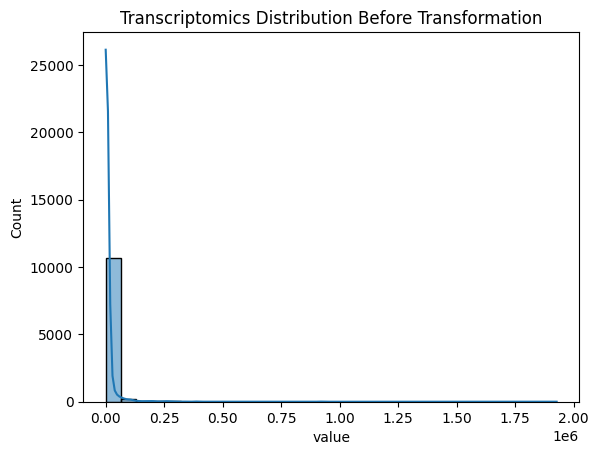

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_kc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution Before Transformation")
plt.show()

In [53]:
Q1 = final_kc["value"].quantile(0.25)
Q3 = final_kc["value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
final_kc= final_kc[(final_kc["value"] >= lower_bound) & (final_kc["value"] <= upper_bound)]


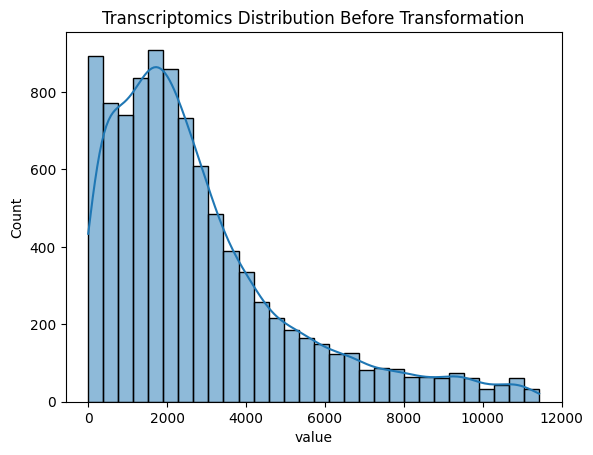

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_kc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution Before Transformation")
plt.show()

In [55]:
#remove values less than 0.09 :
#final_kc_final = final_kc[final_kc["value"] >=1]
#final_kc_final

In [56]:
#remove values greater than 7.09:
#final_kc_final= final_kc_final[final_kc_final["value"] <= 10]
#final_kc_final

In [57]:
#sort values descending:
final_kc_final= final_kc.sort_values(by = "value", ascending = False)
final_kc_final


,sample,value,feature,view,group
1565,"""ID_12585""",11430.522471,Csf1r__ENSMUSG00000024621.15,transcriptomics_KC,group_C
398,"""ID_12574""",11428.215071,Mup7__ENSMUSG00000073842.10,transcriptomics_KC,group_C
3886,"""ID_12604""",11411.250836,Calm1__ENSMUSG00000001175.14,transcriptomics_KC,group_C
2265,"""ID_12670""",11386.575488,Ces3a__ENSMUSG00000069922.12,transcriptomics_KC,group_C
2085,"""ID_12597""",11379.777745,Cst3__ENSMUSG00000027447.6,transcriptomics_KC,group_C
...,...,...,...,...,...
10260,"""ID_12621""",0.999268,Mup5__ENSMUSG00000058523.2,transcriptomics_KC,group_C
10270,"""ID_12607""",0.747557,Mup5__ENSMUSG00000058523.2,transcriptomics_KC,group_C
10253,"""ID_12573""",0.550296,Mup5__ENSMUSG00000058523.2,transcriptomics_KC,group_C
6959,"""ID_12620""",0.493784,Mup-ps17__ENSMUSG00000081053.1,transcriptomics_KC,group_C


In [58]:
#select the first 7000 values:
#final_kc_final = final_kc_final.iloc[:10000]
#print(final_kc_final)

--------------------------------------------------------------------------------------------------------------------

In [59]:
merged_df = pd.concat([final_lipodomics, final_transcriptomics_hc, final_kc_final], ignore_index=True)
merged_df

,sample,value,feature,view,group
0,HFDHFDHFD_ko_2,13.737421,TAG(50:1)_TAG,Lipidomics,group_A
1,HFDHFDHFD_ko_10,13.719714,TAG(54:2)_TAG2,Lipidomics,group_A
2,CDCDCD_ko_25,13.710766,TAG(54:3)_TAG2,Lipidomics,group_A
3,HFDHFDHFD_ko_7,13.684688,TAG(52:3)_TAG,Lipidomics,group_A
4,HFDHFDHFD_ko_7,13.682020,TAG(54:3)_TAG2,Lipidomics,group_A
...,...,...,...,...,...
32560,"""ID_12621""",0.999268,Mup5__ENSMUSG00000058523.2,transcriptomics_KC,group_C
32561,"""ID_12607""",0.747557,Mup5__ENSMUSG00000058523.2,transcriptomics_KC,group_C
32562,"""ID_12573""",0.550296,Mup5__ENSMUSG00000058523.2,transcriptomics_KC,group_C
32563,"""ID_12620""",0.493784,Mup-ps17__ENSMUSG00000081053.1,transcriptomics_KC,group_C


In [60]:
#remove high variable features
# Ensure all data is numeric
numeric_data = merged_df.select_dtypes(include=[np.number])
feature_variances = numeric_data.var(axis=0)
feature_variances



value    4.408795e+06
dtype: float64

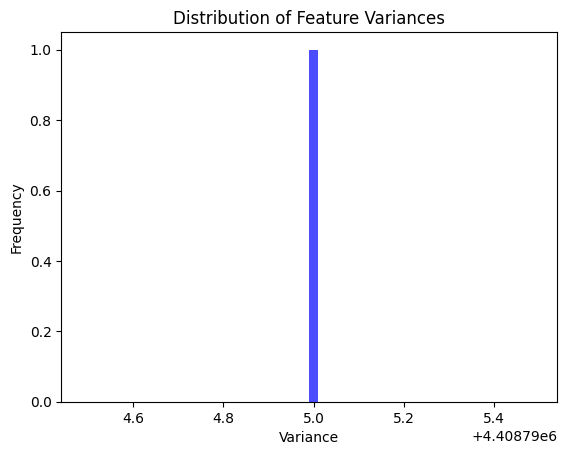

In [61]:
import matplotlib.pyplot as plt


plt.hist(feature_variances, bins=50, color='blue', alpha=0.7)
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Variances')
plt.show()

In [62]:
merged_df['value'].describe()

count    32565.000000
mean      1475.788286
std       2099.713073
min         -0.044485
25%          4.921756
50%        555.165635
75%       2182.798499
max      11430.522471
Name: value, dtype: float64

In [63]:
#set data options:

ent.set_data_options(scale_views = True)  

Scaling views to unit variance...



In [64]:
merged_df = merged_df.drop_duplicates(subset=['group', 'view', 'feature', 'sample'], keep='first')

merged_df

,sample,value,feature,view,group
0,HFDHFDHFD_ko_2,13.737421,TAG(50:1)_TAG,Lipidomics,group_A
1,HFDHFDHFD_ko_10,13.719714,TAG(54:2)_TAG2,Lipidomics,group_A
2,CDCDCD_ko_25,13.710766,TAG(54:3)_TAG2,Lipidomics,group_A
3,HFDHFDHFD_ko_7,13.684688,TAG(52:3)_TAG,Lipidomics,group_A
4,HFDHFDHFD_ko_7,13.682020,TAG(54:3)_TAG2,Lipidomics,group_A
...,...,...,...,...,...
32560,"""ID_12621""",0.999268,Mup5__ENSMUSG00000058523.2,transcriptomics_KC,group_C
32561,"""ID_12607""",0.747557,Mup5__ENSMUSG00000058523.2,transcriptomics_KC,group_C
32562,"""ID_12573""",0.550296,Mup5__ENSMUSG00000058523.2,transcriptomics_KC,group_C
32563,"""ID_12620""",0.493784,Mup-ps17__ENSMUSG00000081053.1,transcriptomics_KC,group_C


In [65]:
# Set the data for MOFA+
ent.set_data_df(merged_df)



Loaded group='group_A' view='Lipidomics' with N=29 samples and D=534 features...
No data found for group='group_A' and view='transcriptomics_KC'...
No data found for group='group_A' and view='transcriptomics_hc'...
No data found for group='group_B' and view='Lipidomics'...
No data found for group='group_B' and view='transcriptomics_KC'...
Loaded group='group_B' view='transcriptomics_hc' with N=24 samples and D=482 features...
No data found for group='group_C' and view='Lipidomics'...
Loaded group='group_C' view='transcriptomics_KC' with N=22 samples and D=481 features...
No data found for group='group_C' and view='transcriptomics_hc'...




In [66]:
#set model options
ent.set_model_options(
    factors= 10,
    spikeslab_weights=True,
    ard_weights=True
)


Model options:
- Automatic Relevance Determination prior on the factors: False
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (Lipidomics): gaussian
- View 1 (transcriptomics_KC): gaussian
- View 2 (transcriptomics_hc): gaussian




In [67]:
#set training options
ent.set_train_options(
    convergence_mode="fast",
    dropR2=0.001,
    gpu_mode=False,
    seed=1
    )

In [68]:
ent.build()
ent.run()

ent.save("s_norm_deseq_log2_wt&ko_mofa+.hdf5")



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -296559.41 

Iteration 1: time=0.02, ELBO=-58042.97, deltaELBO=238516.447 (80.42787957%), Factors=9
Iteration 2: time=0.02, ELBO=-48662.89, deltaELBO=9380.078 (3.16296740%), Factors=9
Iteration 3: time=0.02, ELBO=-44740.09, deltaELBO=3922.802 (1.32277108%), Factors=9
Iteration 4: time=0.02, ELBO=-42550.59, deltaELBO=2189.495 (0.73829885%), Factors=9
Iteration 5: time=0.02, ELBO=-41305.87, deltaELBO=1244.725 (0.41972195%), Factors=9
Iteration 6: time=0.02, ELBO=-40544.39, deltaELBO=761.479 (0.25677106%), Factors=9
Iteration 7: time=0.02, ELBO=-40020.78, deltaELBO=523.609 (0.17656133%), Factors=9
Iteration 8: time=0.02, ELBO=-39527.74, deltaELBO=493.034 (0.16625139%), Factors=9
Iteration 9: time=0.01, ELBO=-38968.00, deltaELBO=559.743 (0.18874581%), Factors=9
Iteration 10: time=0.02, ELBO=-38507.64, deltaELBO=460.360 (0.15523349%), Factors=9
Iterati